# Breast Cancer Classification

<img src="https://www.cityofhope.org/sites/www/files/2025-07/breast-cancer-tumor.jpg" width="400">

The purpose of this project is to apply machine learning skills and techniques using the Wisconsin Breast Cancer dataset. The primary goal is to develop a model that classifies whether a diagnosis is **malignant (M)** or **benign (B)** based on various numerical features extracted from a breast mass.

### Column Features

* **`id`**: A unique identifier for each data instance (patient) (numeric).
* **`label`**: The target variable. It indicates the result of the diagnosis (categorical: 'M' = Malignant, 'B' = Benign).
* **Other 30 Columns**: These are the 30 numeric features of the dataset. These features include three different measurements (mean, se - standard error, and worst - largest value) of cell nucleus characteristics:
    * `radius`
    * `texture`
    * `perimeter`
    * `area`
    * `smoothness`
    * `compactness`
    * `concavity`
    * `concave points`
    * `symmetry`
    * `fractal_dimension`

    *(For example: `radius_mean`, `texture_mean`, `radius_se`, `texture_se`, `radius_worst`, `texture_worst`, etc., for a total of 30 feature columns.)*

The dataset was taken from Kaggle:

[Kaggle | Breast Cancer Classification Prototype, Fall 2025](https://www.kaggle.com/competitions/breast-cancer-classification-prototype-fall-2025/overview)


## Data Read 

In [1]:
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

## EDA - Exploratory Data Analysis

In [3]:
train.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,0.4537,0.8733,3.061,49.810,0.007231,0.027720,0.025090,0.014800,0.01414,0.003336,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050,1.144,9.789,0.007389,0.004883,0.003681,0.003472,0.02701,0.002153,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,0.2666,0.8309,2.097,19.960,0.004405,0.030260,0.043440,0.010870,0.01921,0.004622,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,0.3833,0.9078,2.602,30.150,0.007702,0.008491,0.013070,0.010300,0.02970,0.001432,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [4]:
train.tail()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
450,866674,M,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,0.4953,1.199,2.765,63.33,0.005033,0.031790,0.047550,0.010430,0.01578,0.003224,22.63,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465
451,869254,B,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,0.2525,1.239,1.806,17.74,0.006547,0.017810,0.020180,0.005612,0.01671,0.002360,11.95,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769
452,859717,M,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,0.5907,1.041,3.705,69.47,0.005820,0.056160,0.042520,0.011270,0.01527,0.006299,23.32,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390
453,88249602,B,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,0.1517,0.05835,0.2589,1.503,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.12870,0.15130,0.06231,0.07963,0.2226,0.07617
454,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.342,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   label                    455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [6]:
train.isnull().sum()

id                         0
label                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train['label'].value_counts()

label
B    285
M    170
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

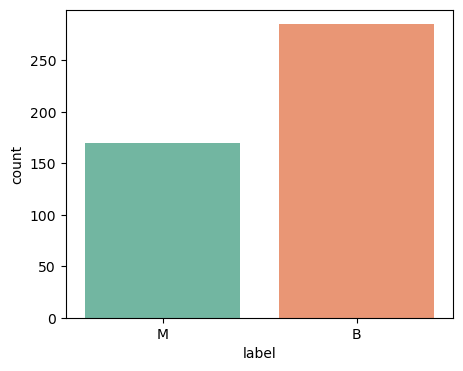

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=train, palette="Set2");

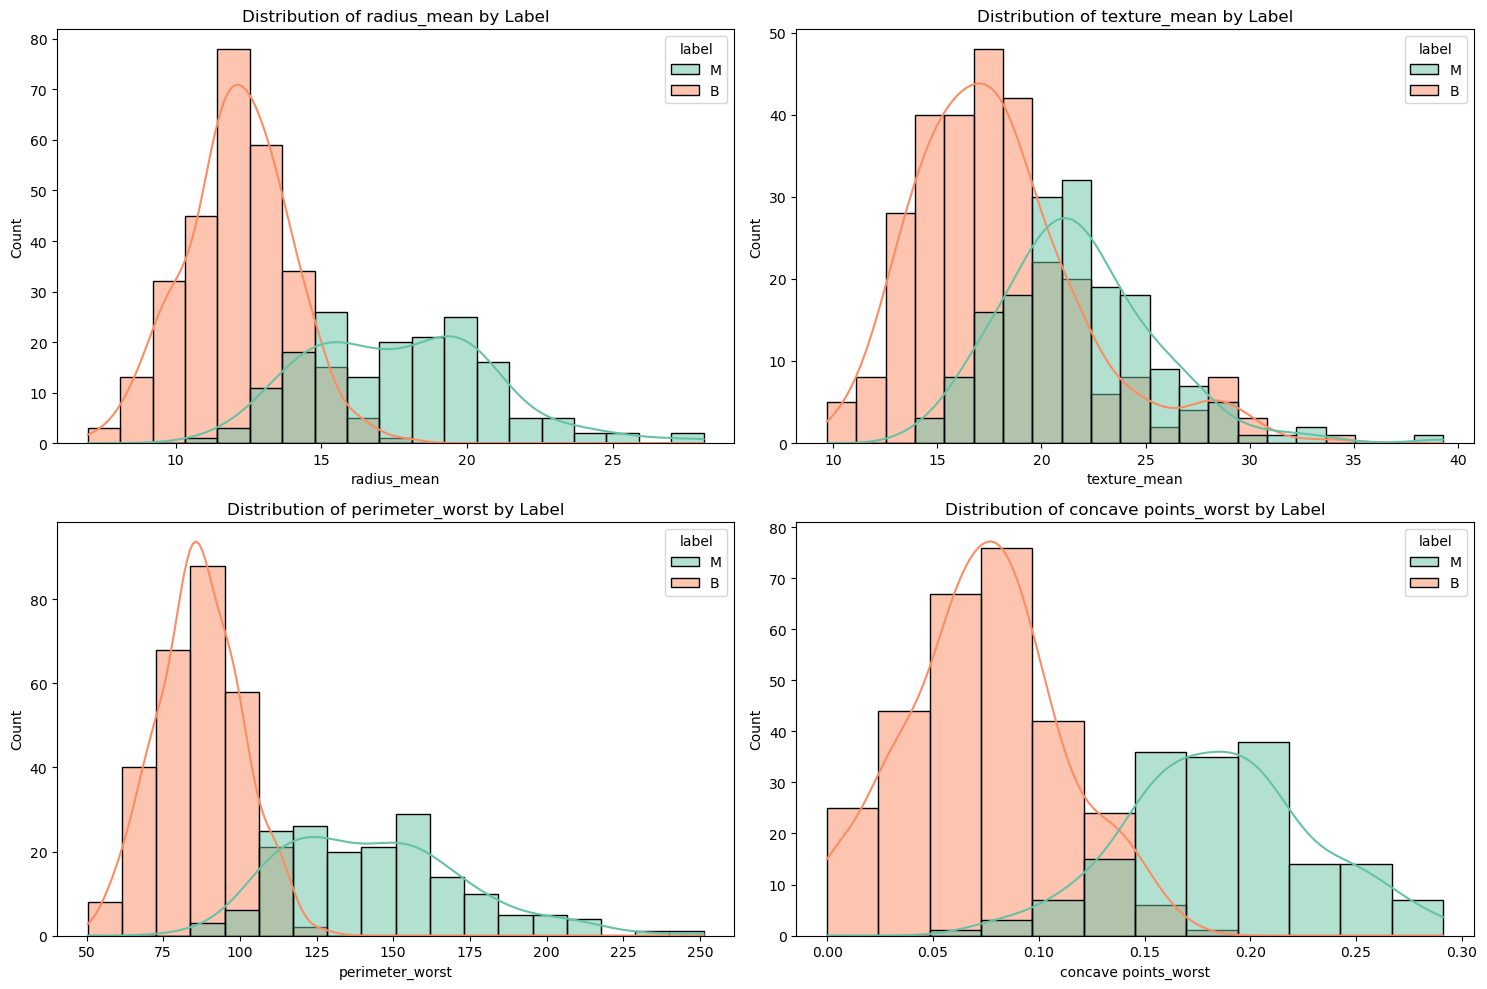

In [11]:
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_worst', 'concave points_worst']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=train, x=feature, hue='label', kde=True, palette='Set2')
    plt.title(f'Distribution of {feature} by Label')
plt.tight_layout()
plt.show()

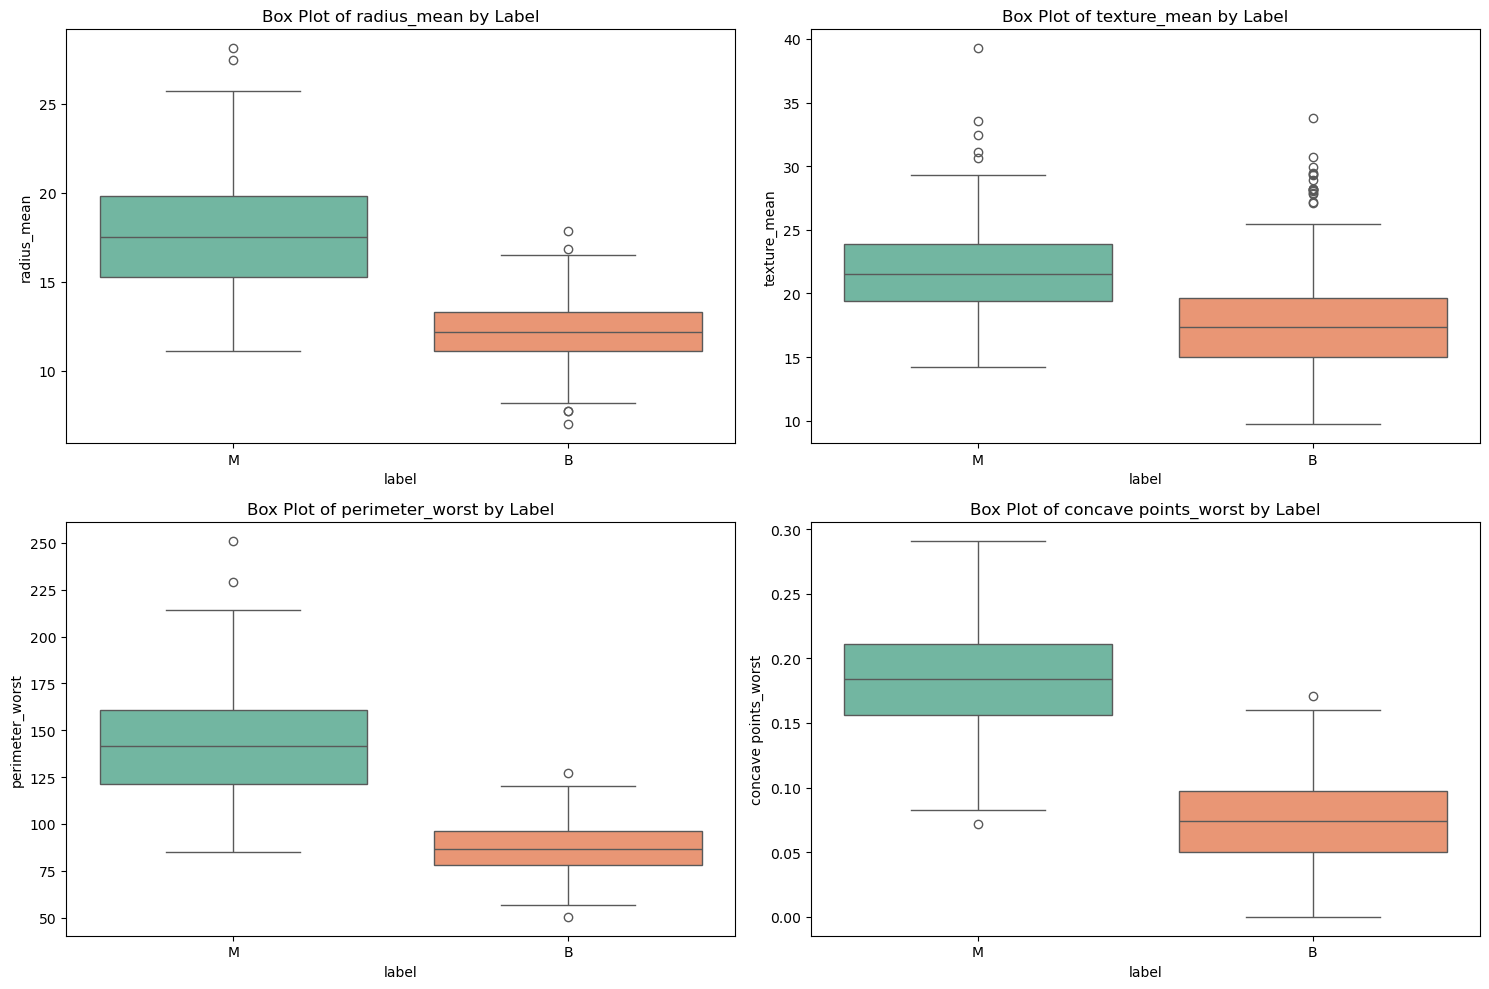

In [12]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='label', y=feature, data=train, palette='Set2')
    plt.title(f'Box Plot of {feature} by Label')
plt.tight_layout()
plt.show()

In [13]:
train_numeric_corr = train.copy()
train_numeric_corr['label'] = train_numeric_corr['label'].map({'B': 0, 'M': 1})

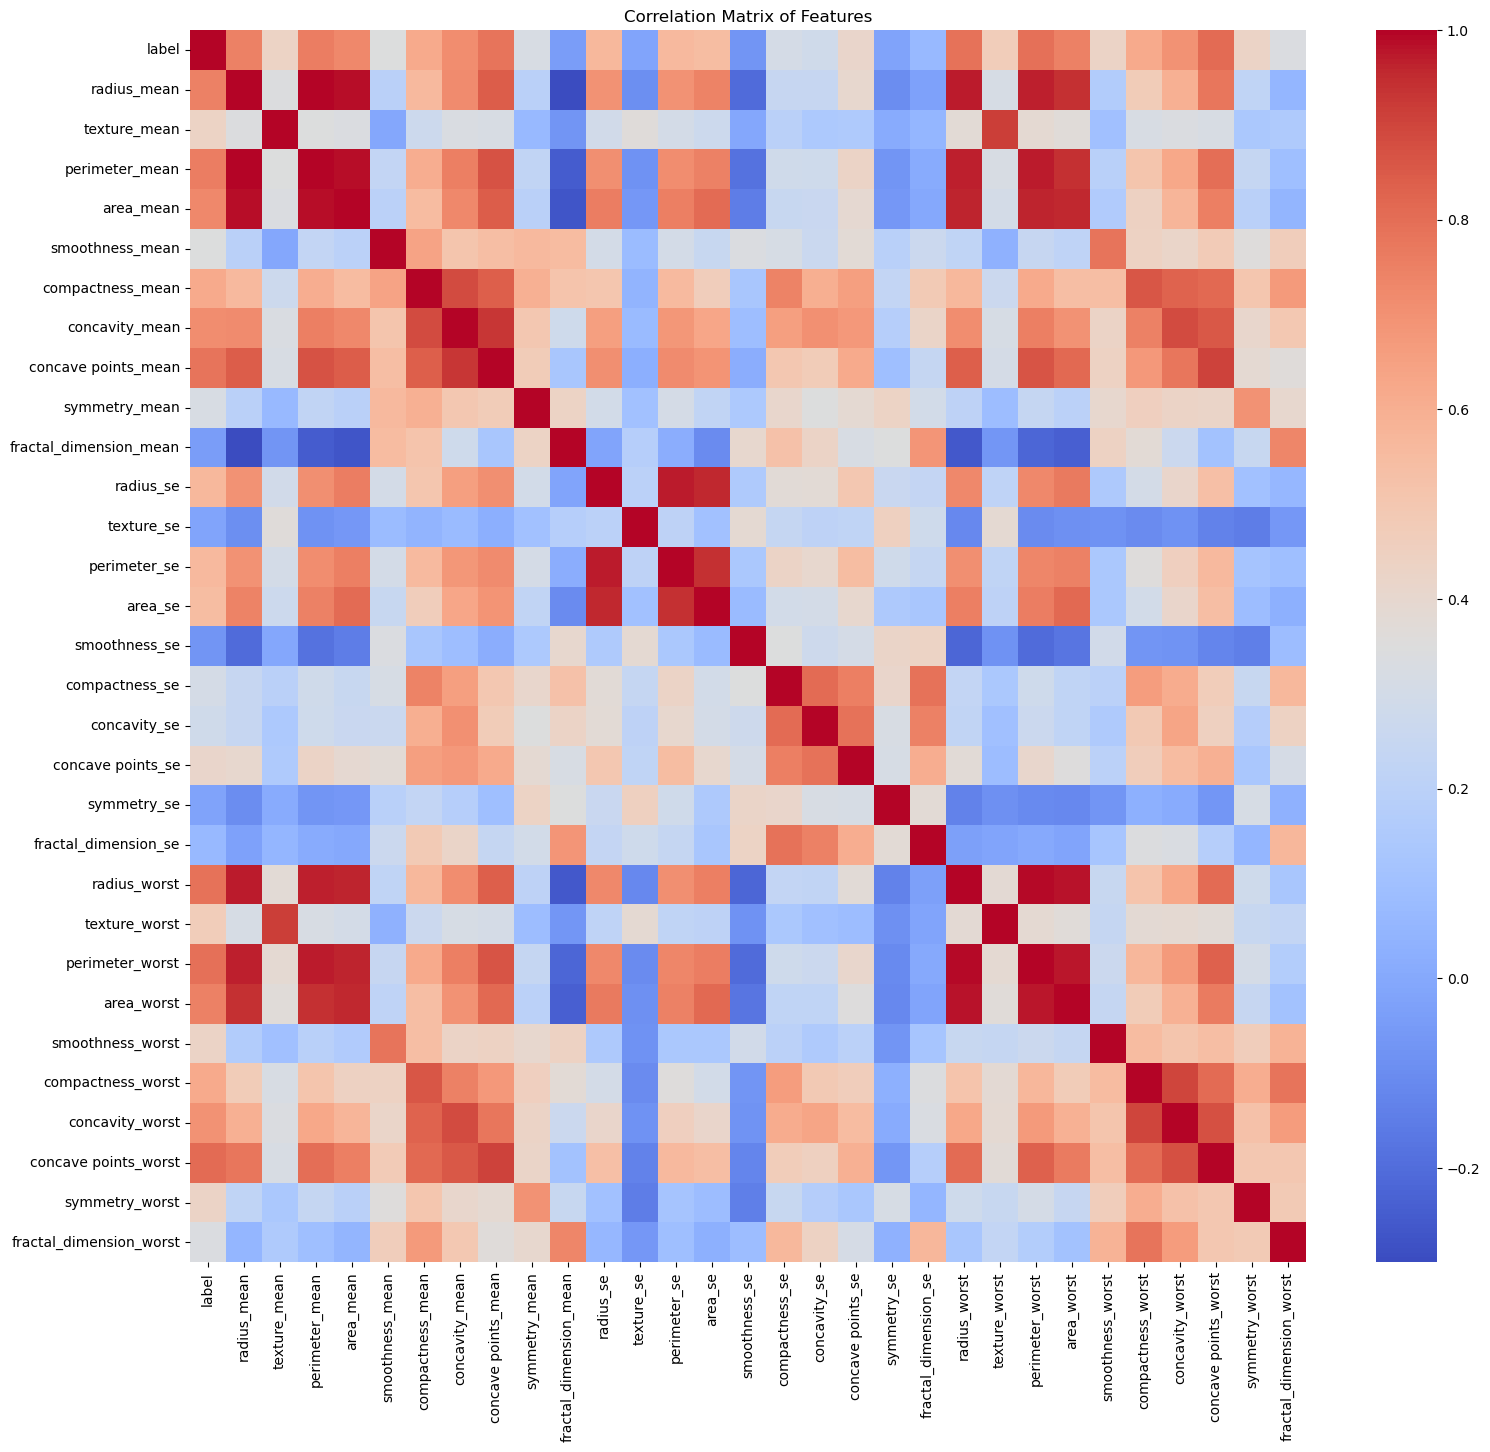

In [14]:
plt.figure(figsize=(18, 16))
sns.heatmap(train_numeric_corr.drop('id', axis=1).corr(), annot=False, cmap='coolwarm', fmt=".2f") 
plt.title('Correlation Matrix of Features')
plt.show()

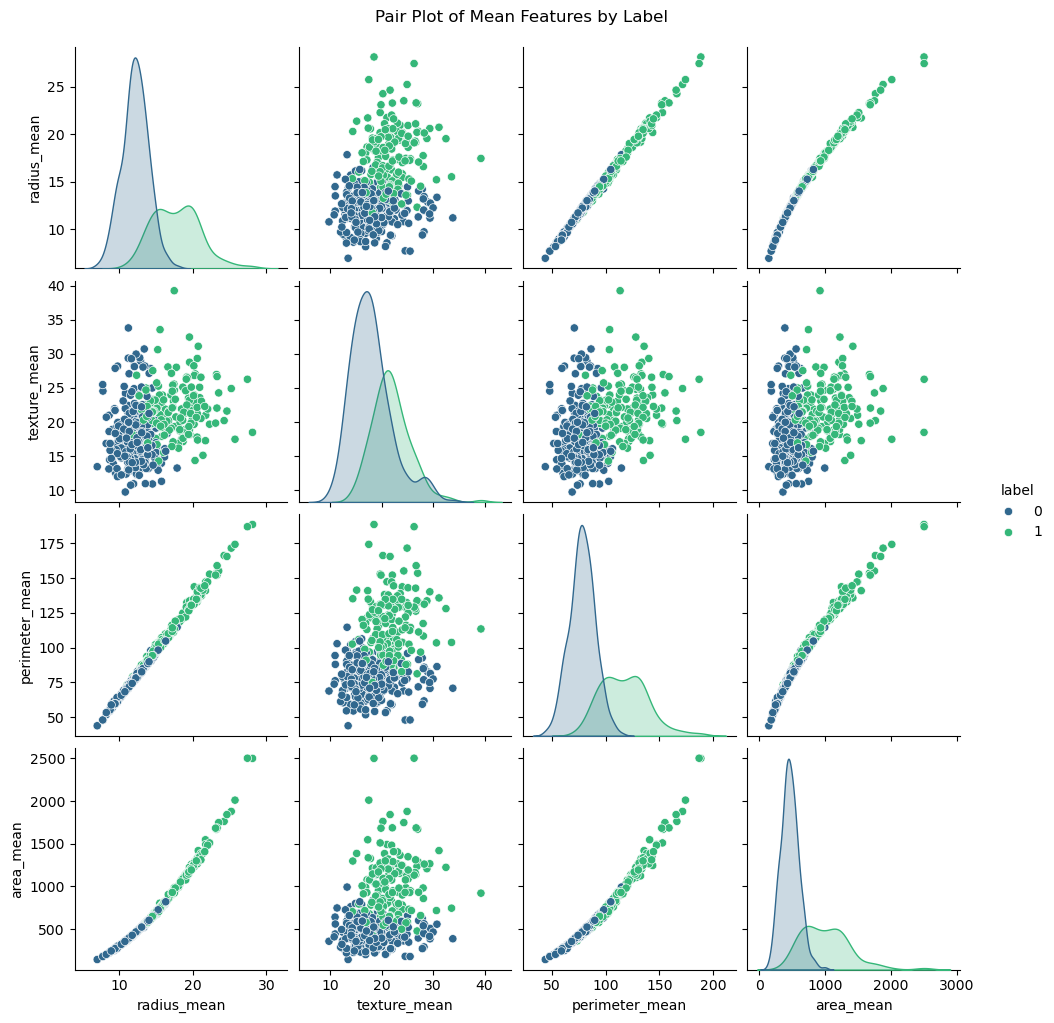

In [15]:
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'label']
sns.pairplot(train_numeric_corr[mean_features], hue='label', palette='viridis')
plt.suptitle('Pair Plot of Mean Features by Label', y=1.02) 
plt.show()

## Modelling 

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [17]:
x = train.drop(columns=['id','label'])
y = train['label']

In [18]:
y.head()

0    M
1    M
2    B
3    B
4    B
Name: label, dtype: object

In [22]:
le = LabelEncoder()

In [24]:
y = le.fit_transform(y)

In [25]:
x_train,x_test, y_train,y_test=train_test_split(x, y, test_size=.20, random_state=42)

In [26]:


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [27]:
algo_test(x, y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[63  0]
 [28  0]]
LogisticRegression()  modeli eğitiliyor!..
[[61  2]
 [ 1 27]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[55  8]
 [ 2 26]]
RandomForestClassifier()  modeli eğitiliyor!..
[[62  1]
 [ 1 27]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[62  1]
 [ 1 27]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[60  3]
 [ 3 25]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[63  0]
 [ 0 28]]
MultinomialNB()  modeli eğitiliyor!..
[[63  0]
 [ 5 23]]
Eğitim tamamlandı.
En başarılı model:  AdaBoostClassifier
Confusion Matrix:
[[63  0]
 [ 0 28]]
classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        28

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

Diğer Modeller:


,Accuracy,Precision,Recall,F1
AdaBoostClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,0.978022,0.978022,0.978022,0.978022
GradientBoostingClassifier,0.978022,0.978022,0.978022,0.978022
LogisticRegression,0.967033,0.967033,0.967033,0.967033
MultinomialNB,0.945055,0.945055,0.945055,0.945055
KNeighborsClassifier,0.934066,0.934066,0.934066,0.934066
DecisionTreeClassifier,0.890110,0.890110,0.890110,0.890110
BernoulliNB,0.692308,0.692308,0.692308,0.692308


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
model = GradientBoostingClassifier(random_state=42)

In [30]:
model.fit(x, y)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
test_ids = test['id']

In [32]:
test = test.drop(columns=['id'])

In [35]:
num_pred = model.predict(test)

In [36]:
label_predictions = le.inverse_transform(num_pred)

In [37]:
submission_df = pd.DataFrame({
    'id': test_ids,
    'label': label_predictions
})

In [38]:
submission_df.to_csv('submission.csv', index=False)

## Conculusion 

<img src="score.png" width="600">



In this project, a machine learning model was developed to classify tumors as malignant (M) or benign (B) using the Wisconsin Breast Cancer dataset.

Following data cleaning and encoding the target variable with `LabelEncoder`, 8 different classification models were compared. The `AdaBoost` model, which scored a perfect 100% on the validation set, was deemed a high risk for overfitting. Therefore, the **`GradientBoostingClassifier`** (validation score: 97.8%), which provided more reliable generalization, was selected as the final model.

The final model was retrained on the entire training dataset to generate predictions for the Kaggle test set.

The submitted `submission.csv` file achieved an accuracy score of **0.96491** on the Kaggle leaderboard, successfully placing the project in **1st place**.
